In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sys
import os

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## Dataset files

In [2]:
file_list = os.listdir('../data/saturation/datasets')
file_list

['dataScaleFree_10_10_7_16000_B.txt',
 'dataScaleFree_10_10_12_16000_M.txt',
 'dataScaleFree_10_10_13_16000_U.txt',
 'dataScaleFree_10_10_54_16000_M.txt',
 'dataScaleFree_10_10_2_16000_B.txt',
 'dataScaleFree_10_10_31_16000_B.txt',
 'dataScaleFree_10_10_21_16000_D.txt',
 'dataScaleFree_10_10_3_16000_M.txt',
 'dataScaleFree_10_10_50_16000_M.txt',
 'dataScaleFree_10_10_10_16000_B.txt',
 'dataScaleFree_10_10_8_16000_D.txt',
 'dataScaleFree_10_10_32_16000_B.txt',
 'dataScaleFree_10_10_50_16000_D.txt',
 'dataScaleFree_10_10_37_16000_U.txt',
 'dataScaleFree_10_10_54_16000_D.txt',
 'dataScaleFree_10_10_24_16000_D.txt',
 'dataScaleFree_10_10_7_16000_D.txt',
 'dataScaleFree_10_10_1_16000_D.txt',
 'dataScaleFree_10_10_1_16000_M.txt',
 'dataScaleFree_10_10_26_16000_D.txt',
 'dataScaleFree_10_10_64_16000_U.txt',
 'dataScaleFree_10_10_14_16000_D.txt',
 'dataScaleFree_10_10_70_16000_M.txt',
 'dataScaleFree_10_10_48_16000_D.txt',
 'dataScaleFree_10_10_30_16000_D.txt',
 'dataScaleFree_10_10_12_16000_B

In [3]:
for i in range(1, 21):
    file = f'dataScaleFree_10_10_{i}_16000_U.txt'
    print(f'File {file} in dir: {file in file_list}')

File dataScaleFree_10_10_1_16000_U.txt in dir: True
File dataScaleFree_10_10_2_16000_U.txt in dir: True
File dataScaleFree_10_10_3_16000_U.txt in dir: True
File dataScaleFree_10_10_4_16000_U.txt in dir: True
File dataScaleFree_10_10_5_16000_U.txt in dir: True
File dataScaleFree_10_10_6_16000_U.txt in dir: True
File dataScaleFree_10_10_7_16000_U.txt in dir: True
File dataScaleFree_10_10_8_16000_U.txt in dir: True
File dataScaleFree_10_10_9_16000_U.txt in dir: True
File dataScaleFree_10_10_10_16000_U.txt in dir: True
File dataScaleFree_10_10_11_16000_U.txt in dir: True
File dataScaleFree_10_10_12_16000_U.txt in dir: True
File dataScaleFree_10_10_13_16000_U.txt in dir: True
File dataScaleFree_10_10_14_16000_U.txt in dir: True
File dataScaleFree_10_10_15_16000_U.txt in dir: True
File dataScaleFree_10_10_16_16000_U.txt in dir: True
File dataScaleFree_10_10_17_16000_U.txt in dir: True
File dataScaleFree_10_10_18_16000_U.txt in dir: True
File dataScaleFree_10_10_19_16000_U.txt in dir: True
Fi

## Loss function

In [4]:
import tensorflow.keras.backend as kb

In [5]:
def custom_loss(y_true,y_pred):
    custom_loss=kb.mean(kb.square(y_true-y_pred))
    return custom_loss

## One Hidden Layer Model

In [6]:
error_dict = {}
for i in range(1, 21):
    file = f'../data/saturation/datasets/dataScaleFree_10_10_{i}_16000_U.txt'
    data = pd.read_table(file, sep=' ', header=None)
    
    X = data.iloc[:, :100]
    y = data.iloc[:, 100:200]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2 / 0.8, random_state=42)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_val = np.array(X_val)
    y_val = np.array(y_val)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100, 
                            input_shape=(100,), 
                            activation='sigmoid',
                            kernel_regularizer=tf.keras.regularizers.l2(0.00003)),
      tf.keras.layers.Dense(100, 
                            activation='relu',
                            kernel_regularizer=tf.keras.regularizers.l2(0.00003))
    ])

    model.compile(optimizer='adam',
                  loss=custom_loss)

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    model.fit(X_train, 
              y_train, 
              epochs=7500000, 
              callbacks=[callback], 
              validation_data=(X_val, y_val),
              verbose=0)
    
    test_error = custom_loss(y_test, model.predict(X_test))
    print(i, test_error)
    error_dict[i] = test_error

1 tf.Tensor(0.000666409090716449, shape=(), dtype=float64)
2 tf.Tensor(0.0006095541107495181, shape=(), dtype=float64)
3 tf.Tensor(0.0005131618191596041, shape=(), dtype=float64)
4 tf.Tensor(0.0006853072491632306, shape=(), dtype=float64)
5 tf.Tensor(0.00036940656041580363, shape=(), dtype=float64)
6 tf.Tensor(0.000460940101839891, shape=(), dtype=float64)
7 tf.Tensor(0.00036649432862776864, shape=(), dtype=float64)
8 tf.Tensor(0.0004395503193802018, shape=(), dtype=float64)
9 tf.Tensor(0.0005930001113665112, shape=(), dtype=float64)
10 tf.Tensor(0.0007598079605936702, shape=(), dtype=float64)
11 tf.Tensor(0.003524687676442172, shape=(), dtype=float64)
12 tf.Tensor(0.012738576167254191, shape=(), dtype=float64)
13 tf.Tensor(0.012508352471403543, shape=(), dtype=float64)
14 tf.Tensor(0.03094370458267963, shape=(), dtype=float64)
15 tf.Tensor(0.051844834784865616, shape=(), dtype=float64)
16 tf.Tensor(0.07325653059732157, shape=(), dtype=float64)
17 tf.Tensor(0.054132159675549865, shape=

In [7]:
error_dict

{1: <tf.Tensor: shape=(), dtype=float64, numpy=0.000666409090716449>,
 2: <tf.Tensor: shape=(), dtype=float64, numpy=0.0006095541107495181>,
 3: <tf.Tensor: shape=(), dtype=float64, numpy=0.0005131618191596041>,
 4: <tf.Tensor: shape=(), dtype=float64, numpy=0.0006853072491632306>,
 5: <tf.Tensor: shape=(), dtype=float64, numpy=0.00036940656041580363>,
 6: <tf.Tensor: shape=(), dtype=float64, numpy=0.000460940101839891>,
 7: <tf.Tensor: shape=(), dtype=float64, numpy=0.00036649432862776864>,
 8: <tf.Tensor: shape=(), dtype=float64, numpy=0.0004395503193802018>,
 9: <tf.Tensor: shape=(), dtype=float64, numpy=0.0005930001113665112>,
 10: <tf.Tensor: shape=(), dtype=float64, numpy=0.0007598079605936702>,
 11: <tf.Tensor: shape=(), dtype=float64, numpy=0.003524687676442172>,
 12: <tf.Tensor: shape=(), dtype=float64, numpy=0.012738576167254191>,
 13: <tf.Tensor: shape=(), dtype=float64, numpy=0.012508352471403543>,
 14: <tf.Tensor: shape=(), dtype=float64, numpy=0.03094370458267963>,
 15: <

In [8]:
model.evaluate(X_test, y_test)

2000/2000 [==============================] - 0s 23us/sample - loss: 0.0982


0.09818397569656372

## Two layer model

In [9]:
error_dict2 = {}
for i in range(1, 21):
    file = f'../data/saturation/datasets/dataScaleFree_10_10_{i}_16000_U.txt'
    data = pd.read_table(file, sep=' ', header=None)
    
    X = data.iloc[:, :100]
    y = data.iloc[:, 100:200]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2 / 0.8, random_state=42)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_val = np.array(X_val)
    y_val = np.array(y_val)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, 
                              input_shape=(100,), 
                              activation='sigmoid',
                              kernel_regularizer=tf.keras.regularizers.l2(0.00003)),
        tf.keras.layers.Dense(100, 
                              input_shape=(100,), 
                              activation='sigmoid',
                              kernel_regularizer=tf.keras.regularizers.l2(0.00003)),
        tf.keras.layers.Dense(100, 
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.00003))
    ])

    model.compile(optimizer='adam',
                  loss='mean_squared_error')

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    model.fit(X_train, 
              y_train, 
              epochs=7500000, 
              callbacks=[callback], 
              validation_data=(X_val, y_val),
              verbose=0)
    
    test_error = custom_loss(y_test, model.predict(X_test))
    print(i, test_error)
    error_dict2[i] = test_error

1 tf.Tensor(0.00024814558219780317, shape=(), dtype=float64)
2 tf.Tensor(0.0004682744713594238, shape=(), dtype=float64)
3 tf.Tensor(0.00013973086268503825, shape=(), dtype=float64)
4 tf.Tensor(0.0001523330498697841, shape=(), dtype=float64)
5 tf.Tensor(0.00022081467823199715, shape=(), dtype=float64)
6 tf.Tensor(0.0002346761124434019, shape=(), dtype=float64)
7 tf.Tensor(0.00036555512787079375, shape=(), dtype=float64)
8 tf.Tensor(0.0004046591539354058, shape=(), dtype=float64)
9 tf.Tensor(0.0009762184981866761, shape=(), dtype=float64)
10 tf.Tensor(0.001843665345380457, shape=(), dtype=float64)
11 tf.Tensor(0.004837488417891728, shape=(), dtype=float64)
12 tf.Tensor(0.004182492788113464, shape=(), dtype=float64)
13 tf.Tensor(0.00855870503069593, shape=(), dtype=float64)
14 tf.Tensor(0.017447833365754208, shape=(), dtype=float64)
15 tf.Tensor(0.034791104915326825, shape=(), dtype=float64)
16 tf.Tensor(0.018882888879626126, shape=(), dtype=float64)
17 tf.Tensor(0.027064249976682095, sh

In [10]:
error_dict2

{1: <tf.Tensor: shape=(), dtype=float64, numpy=0.00024814558219780317>,
 2: <tf.Tensor: shape=(), dtype=float64, numpy=0.0004682744713594238>,
 3: <tf.Tensor: shape=(), dtype=float64, numpy=0.00013973086268503825>,
 4: <tf.Tensor: shape=(), dtype=float64, numpy=0.0001523330498697841>,
 5: <tf.Tensor: shape=(), dtype=float64, numpy=0.00022081467823199715>,
 6: <tf.Tensor: shape=(), dtype=float64, numpy=0.0002346761124434019>,
 7: <tf.Tensor: shape=(), dtype=float64, numpy=0.00036555512787079375>,
 8: <tf.Tensor: shape=(), dtype=float64, numpy=0.0004046591539354058>,
 9: <tf.Tensor: shape=(), dtype=float64, numpy=0.0009762184981866761>,
 10: <tf.Tensor: shape=(), dtype=float64, numpy=0.001843665345380457>,
 11: <tf.Tensor: shape=(), dtype=float64, numpy=0.004837488417891728>,
 12: <tf.Tensor: shape=(), dtype=float64, numpy=0.004182492788113464>,
 13: <tf.Tensor: shape=(), dtype=float64, numpy=0.00855870503069593>,
 14: <tf.Tensor: shape=(), dtype=float64, numpy=0.017447833365754208>,
 15

## Ploting

In [11]:
x = [x / 10 for x in range(1, 21)]
y1 = [x.numpy() for x in error_dict.values()]
y2 = [x.numpy() for x in error_dict2.values()]

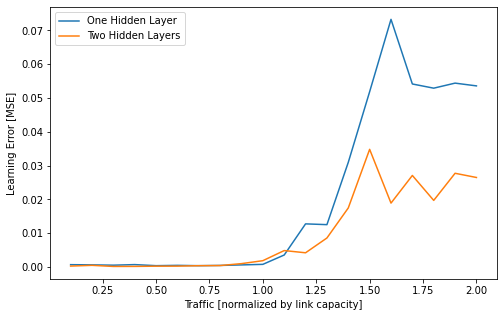

In [28]:
plt.figure(figsize=(8, 5))

plt.plot(x, y1, label='One Hidden Layer')
plt.plot(x, y2, label='Two Hidden Layers')

plt.xlabel('Traffic [normalized by link capacity]')
plt.ylabel('Learning Error [MSE]')

plt.legend()
plt.savefig('../plots/01_error_x_saturation.png')

## Checking intervals

In [6]:
error_dict = {}
max_mean = pd.DataFrame(columns=['rho', 'x_max', 'x_mean', 'y_max', 'y_mean', 'y_std'])
for i in range(1, 21):
    file = f'../data/saturation/datasets/dataScaleFree_10_10_{i}_16000_U.txt'
    data = pd.read_table(file, sep=' ', header=None)
    
    X = data.iloc[:, :100]
    y = data.iloc[:, 100:200]
    rho = i/10
    x_max = np.max(np.array(X))
    x_mean = np.mean(np.array(X))
    y_max = np.max(np.array(y))
    y_mean = np.mean(np.array(y))
    y_std = np.std(np.array(y))
    max_mean.loc[i - 1] = [rho, x_max, x_mean, y_max, y_mean, y_std]
max_mean    

,rho,x_max,x_mean,y_max,y_mean,y_std
0,0.1,0.111968,0.049516,0.358420,0.185908,0.095086
1,0.2,0.215322,0.099019,0.364855,0.192514,0.098748
2,0.3,0.318192,0.148527,0.375845,0.199860,0.102907
3,0.4,0.421877,0.198034,0.390543,0.208116,0.107659
4,0.5,0.524417,0.247543,0.426717,0.217502,0.113163
5,0.6,0.626015,0.297045,0.482026,0.228317,0.119664
6,0.7,0.725241,0.346550,0.571421,0.241014,0.127557
7,0.8,0.827174,0.396054,0.747965,0.256278,0.137532
8,0.9,0.930638,0.445563,1.273670,0.275305,0.151041
9,1.0,1.030120,0.495070,2.578770,0.300568,0.172525


No handles with labels found to put in legend.


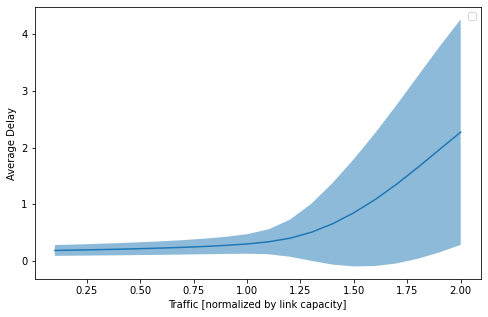

In [7]:
plt.figure(figsize=(8, 5))

x = max_mean.rho
y = max_mean.y_mean
y_std = max_mean.y_std
plt.plot(x, y)

plt.fill_between(x, y - y_std, y + y_std, alpha=0.5)

plt.xlabel('Traffic [normalized by link capacity]')
plt.ylabel('Average Delay')

plt.legend()
plt.savefig('../plots/01_avgdelay_x_saturation.png')